In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

In [56]:
train = pd.read_csv("train.csv")
# print first 5 examples
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

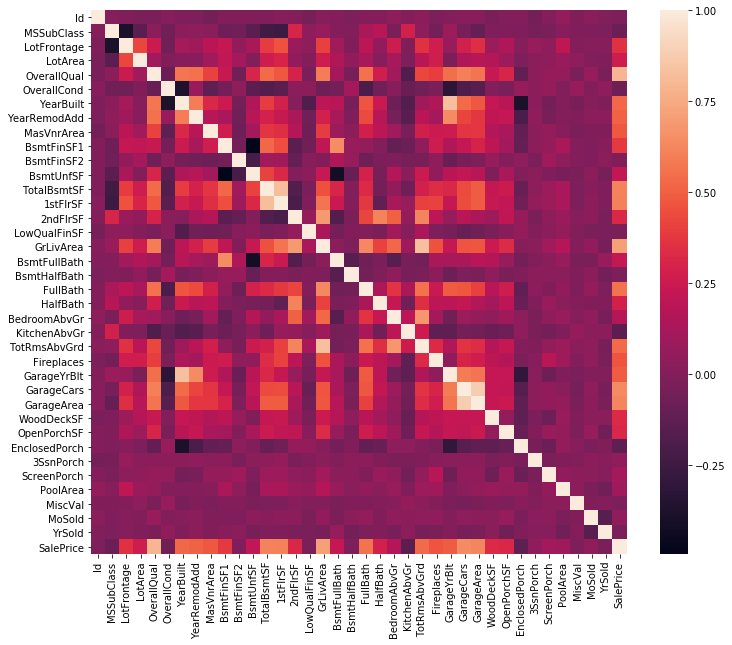

In [3]:
plt.figure(figsize=(12,10));
sns.heatmap(train.corr());

In [4]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
train.shape

(1460, 81)

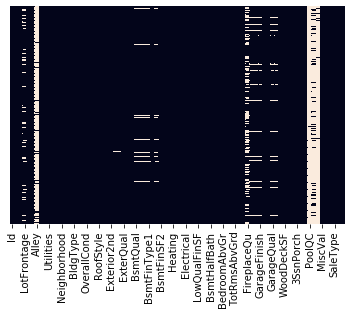

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [57]:
train.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [9]:
train.shape

(1460, 78)

In [4]:
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression


In [11]:
pip install autoimpute

Note: you may need to restart the kernel to use updated packages.


In [69]:
from autoimpute.imputations import SingleImputer
from autoimpute.imputations import MultipleImputer

In [62]:
si_dict = SingleImputer(strategy={"LotFrontage":"pmm", "MasVnrArea": "pmm","GarageYrBlt":"mode","Electrical":"mode","FireplaceQu":"multinomial logistic","GarageType":"mode","GarageFinish":"multinomial logistic","GarageQual":"multinomial logistic","GarageCond":"mode","Fence":"mode"})

In [16]:
train.shape

(1460, 78)

In [23]:
train.loc[:,"Fence"].head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5    MnPrv
6      NaN
7      NaN
8      NaN
9      NaN
Name: Fence, dtype: object

In [67]:
si_dict.fit(train)

SingleImputer(copy=True, imp_kwgs=None, predictors='all', seed=None,
              strategy={'Electrical': 'mode', 'Fence': 'mode',
                        'FireplaceQu': 'multinomial logistic',
                        'GarageCond': 'mode',
                        'GarageFinish': 'multinomial logistic',
                        'GarageQual': 'multinomial logistic',
                        'GarageType': 'mode', 'GarageYrBlt': 'mode',
                        'LotFrontage': 'pmm', 'MasVnrArea': 'pmm'},
              visit='default')

In [65]:
imp =SingleImputer(copy=True, imp_kwgs=None, predictors='all', seed=None,
              strategy={'Electrical': 'mode', 'Fence': 'mode',
                        'FireplaceQu': 'multinomial logistic',
                        'GarageCond': 'mode',
                        'GarageFinish': 'multinomial logistic',
                        'GarageQual': 'multinomial logistic',
                        'GarageType': 'mode', 'GarageYrBlt': 'mode',
                        'LotFrontage': 'pmm', 'MasVnrArea': 'pmm'},
              visit='default')

In [77]:
imp2 =MultipleImputer(n=10,
              strategy={'Electrical': 'mode', 'Fence': 'mode',
                        'FireplaceQu': 'multinomial logistic',
                        'GarageCond': 'mode',
                        'GarageFinish': 'multinomial logistic',
                        'GarageQual': 'multinomial logistic',
                        'GarageType': 'mode', 'GarageYrBlt': 'mode',
                        'LotFrontage': 'pmm', 'MasVnrArea': 'pmm'},
                      visit="left-to-right",
              return_list=True)

In [84]:
Electrical=train.loc[:,"Electrical"]

In [85]:
impElectrical=SingleImputer(copy=True, imp_kwgs=None, predictors='all', seed=None,
              strategy={'Electrical': 'mode', 'Fence': 'mode',
                        'FireplaceQu': 'multinomial logistic',
                        'GarageCond': 'mode',
                        'GarageFinish': 'multinomial logistic',
                        'GarageQual': 'multinomial logistic',
                        'GarageType': 'mode', 'GarageYrBlt': 'mode',
                        'LotFrontage': 'pmm', 'MasVnrArea': 'pmm'},
              visit='default')

In [58]:
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])

In [59]:
train['Fence']=train['Fence'].fillna(train['Fence'].mode()[0])

In [60]:
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])

In [61]:
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])

In [62]:
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])

In [98]:
train.to_excel(r'Desktop\export_data.xlsx')

In [96]:
train.shape

(1460, 78)

In [63]:
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])

In [64]:
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])

In [65]:
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])

In [12]:
train.loc[:,"MasVnrArea"].isnull().sum()

8

In [66]:
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [67]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].median())

In [15]:
train.loc[:,"LotFrontage"].isnull().sum()

0

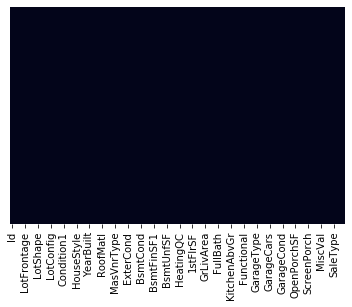

In [121]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [68]:
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])

In [17]:
train.loc[:,"MasVnrType"].isnull().sum()

0

In [69]:
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])

In [18]:
train.dropna(inplace=True)

In [72]:
train.shape

(1460, 77)

In [71]:
train.drop(['Fence'],axis=1,inplace=True)

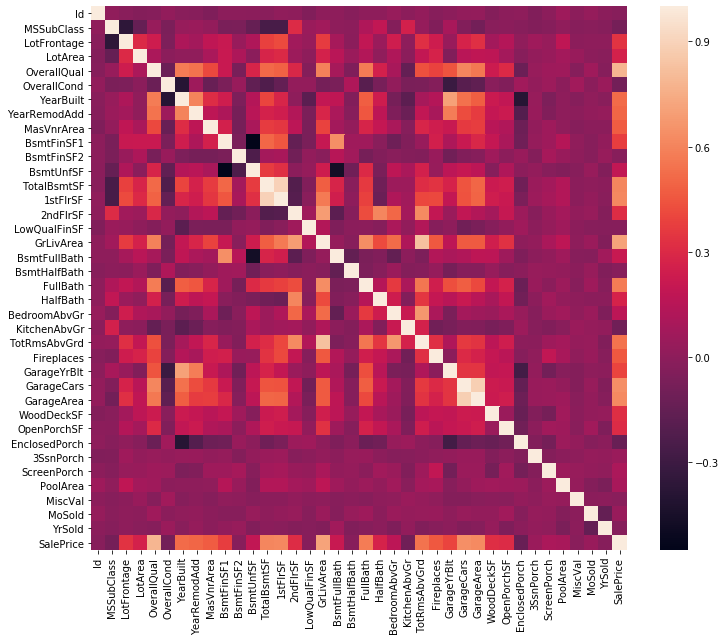

In [125]:
plt.figure(figsize=(12,10));
sns.heatmap(train.corr());

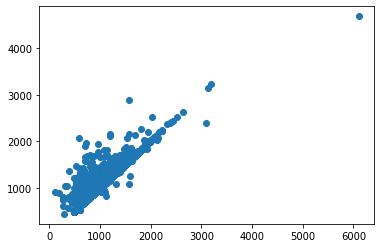

In [130]:
plt.plot(train.loc[:,"TotalBsmtSF"],train.loc[:,"1stFlrSF"],"o")

In [132]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013411187C18>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

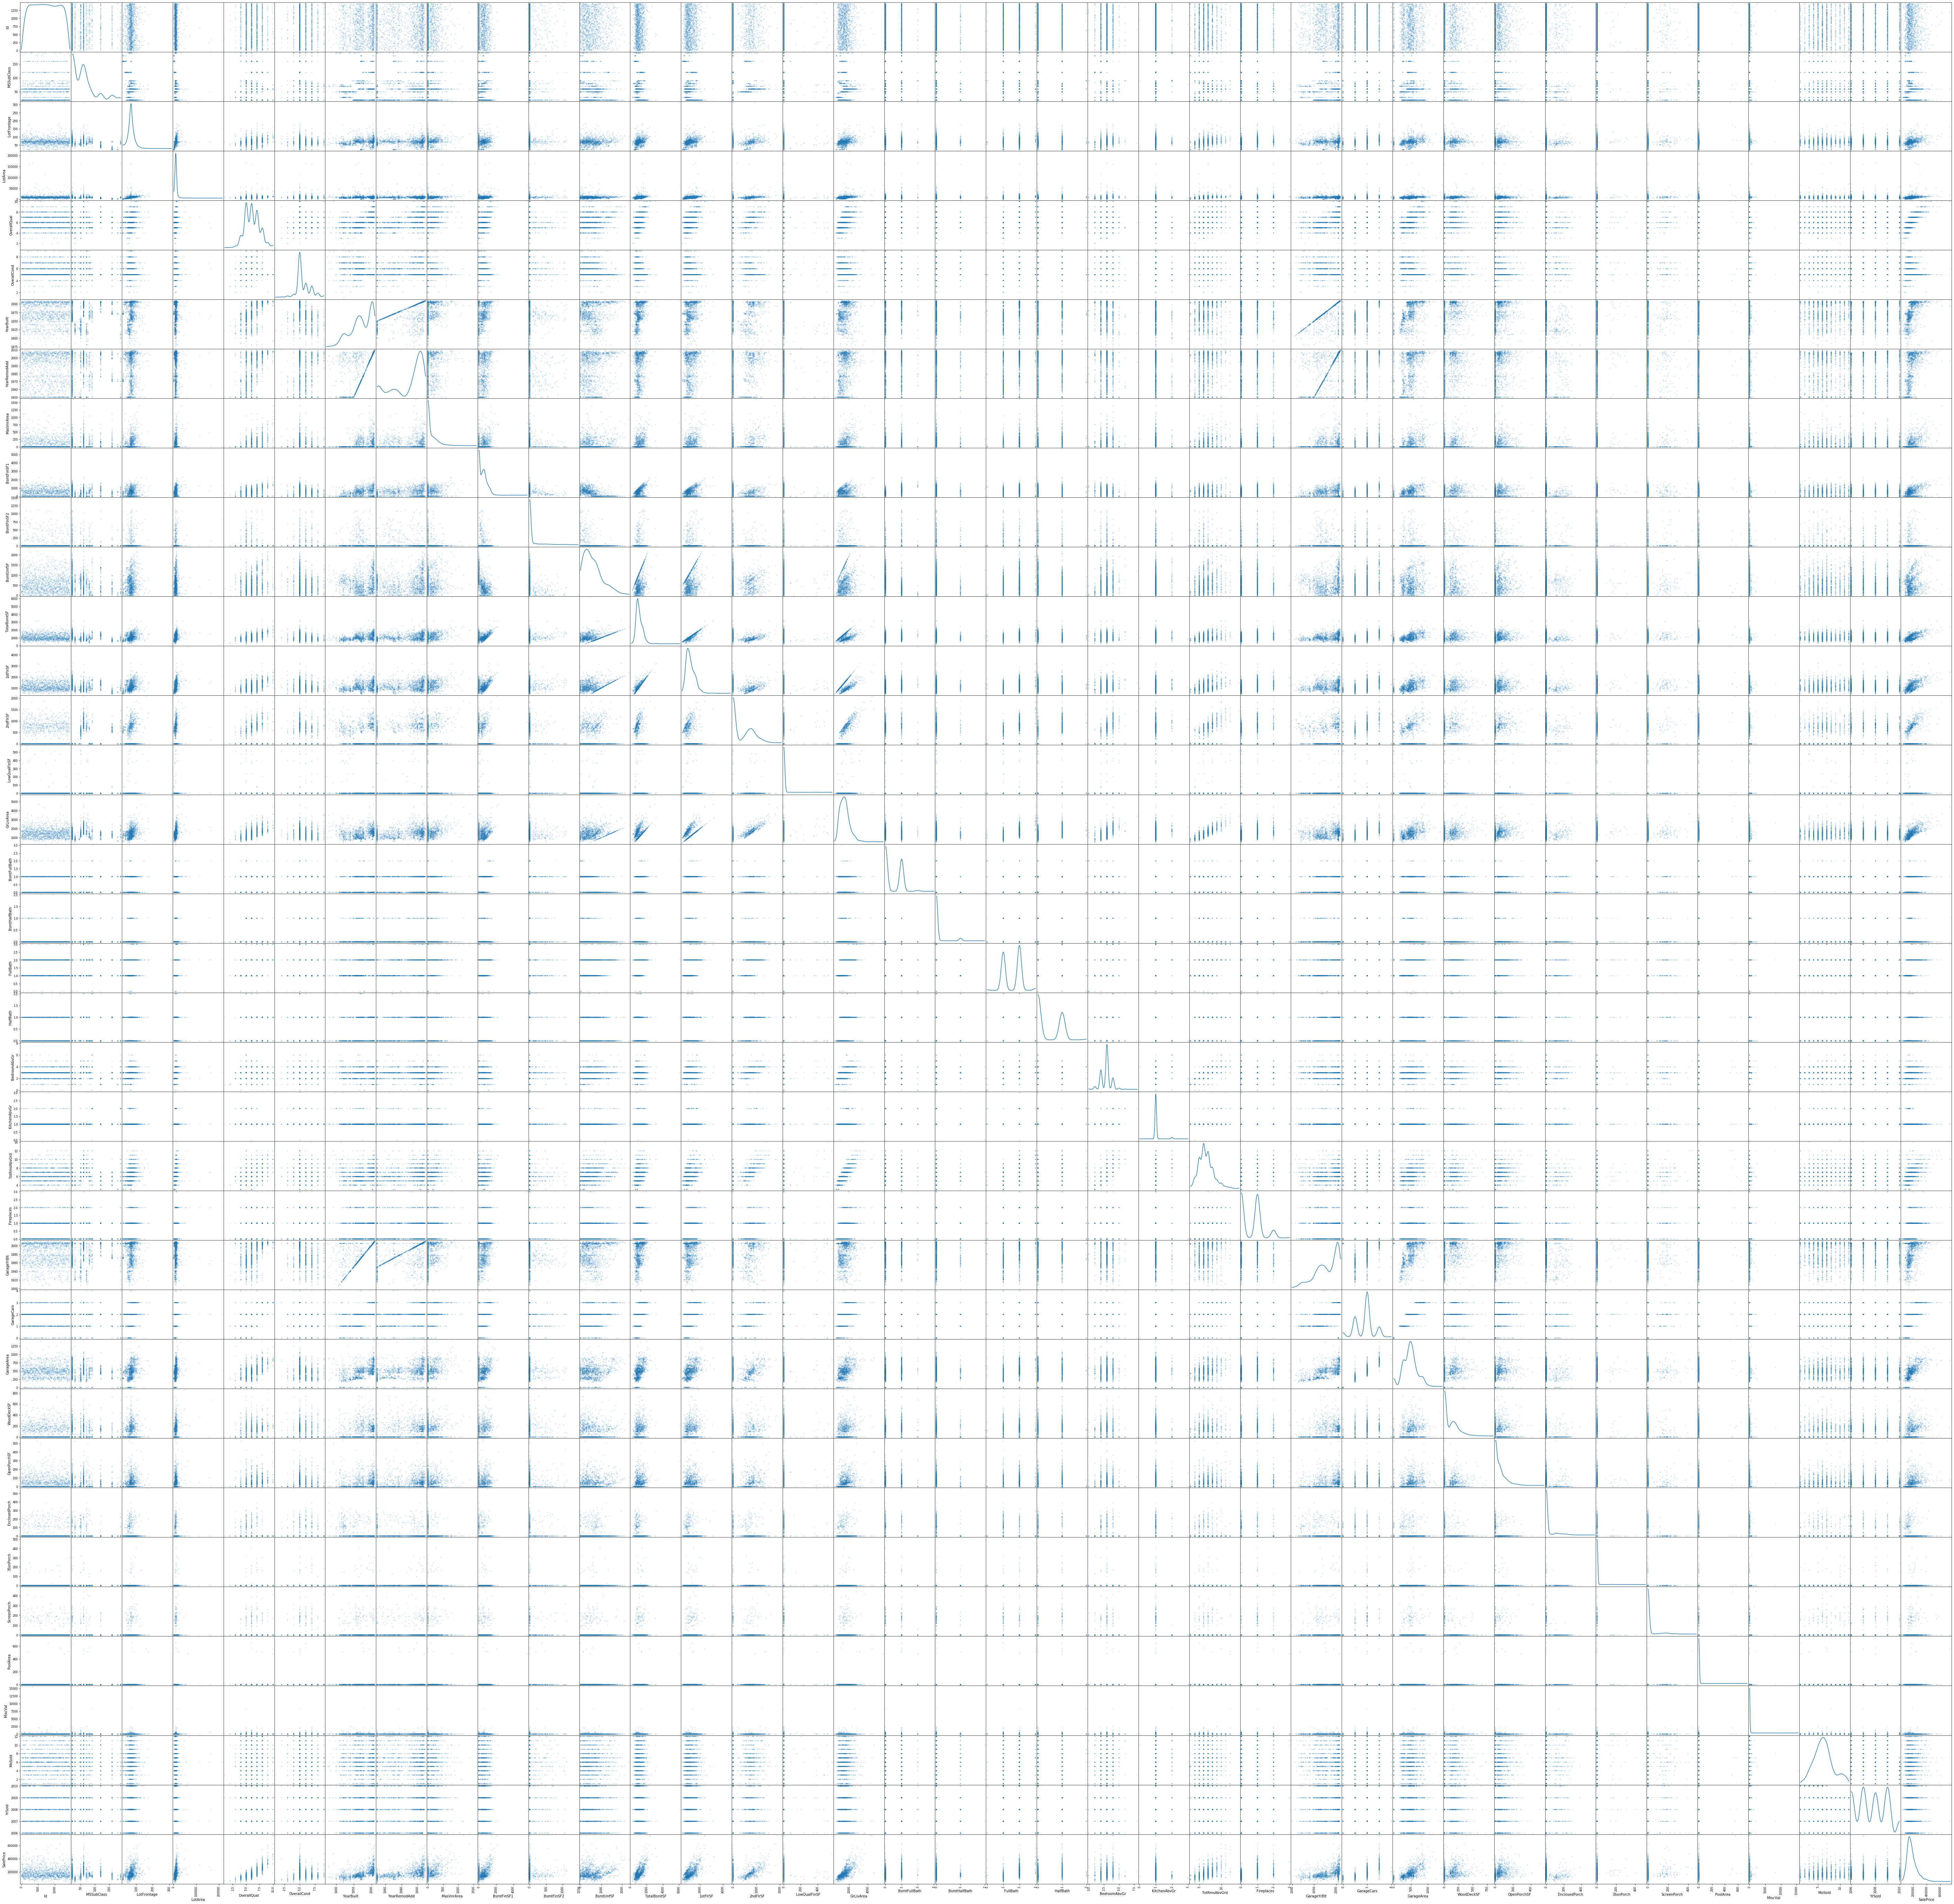

In [134]:
scatter_matrix(train, alpha = 0.2, figsize = (100, 100), diagonal = 'kde')

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [73]:
train2 = pd.get_dummies(train)

In [74]:
train2.shape

(1460, 277)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
%matplotlib inline

In [25]:
X = train2.drop(columns=['SalePrice'],axis=1)
y = train2.loc[:,'SalePrice']

In [26]:
lm = linear_model.LinearRegression()
model = lm.fit(X, y)

In [27]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [50]:
test = pd.read_csv("test.csv")

In [87]:
test4.shape

(1459, 27)

In [86]:
test4=pd.get_dummies(test3)

In [92]:
train4=pd.get_dummies(train3)

In [78]:
predictions = model.predict(test2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

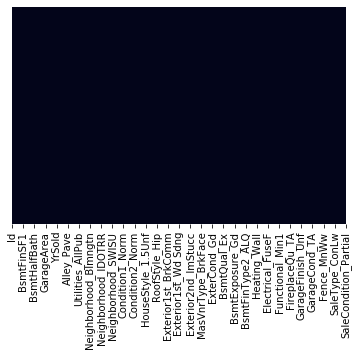

In [54]:
sns.heatmap(test2.isnull(),yticklabels=False,cbar=False)

In [37]:
test.shape

(1459, 79)

In [62]:
test2.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1146.000000  1146.000000  1146.000000   1146.000000  1146.000000   
mean   2187.336824    56.461606    69.020942   9560.188482     6.138743   
std     423.997893    42.486338    22.381712   4422.310277     1.458880   
min    1461.000000    20.000000    21.000000   1484.000000     1.000000   
25%    1817.250000    20.000000    59.000000   7200.000000     5.000000   
50%    2198.500000    50.000000    68.000000   9350.000000     6.000000   
75%    2545.750000    70.000000    80.000000  11220.750000     7.000000   
max    2919.000000   190.000000   200.000000  51974.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1146.000000  1146.000000   1146.000000  1146.000000  1146.000000  ...   
mean      5.589005  1971.695462   1984.129145   102.821117   439.190227  ...   
std       1.066120    30.683263     21.321308   178.843305   464.159629  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1952.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1974.000000   1993.000000     0.000000   342.500000  ...   
75%       6.000000  2003.000000   2004.000000   170.000000   744.750000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

       SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
count     1146.000000   1146.000000   1146.000000  1146.000000   
mean         0.002618      0.090750      0.001745     0.849040   
std          0.051120      0.287379      0.041757     0.358166   
min          0.000000      0.000000      0.000000     0.000000   
25%          0.000000      0.000000      0.000000     1.000000   
50%          0.000000      0.000000      0.000000     1.000000   
75%          0.000000      0.000000      0.000000     1.000000   
max          1.000000      1.000000      1.000000     1.000000   

       SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
count            1146.000000            1146.000000           1146.000000   
mean                0.057592               0.004363              0.007853   
std                 0.233071               0.065938              0.088309   
min                 0.000000               0.000000              0.000000   
25%                 0.000000               0.000000              0.000000   
50%                 0.000000               0.000000              0.000000   
75%                 0.000000               0.000000              0.000000   
max                 1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1146.000000           1146.000000            1146.000000  
mean               0.018325              0.818499               0.093368  
std                0.134181              0.385601               0.291075  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 271 columns]

In [54]:
test['Electrical']=test['Electrical'].fillna(test['Electrical'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].mode()[0])
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].median())
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test.drop(['Fence'],axis=1,inplace=True)

In [52]:
test.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace=True)

In [55]:
test.shape

(1459, 76)

In [46]:
test.dropna(inplace=True)

In [83]:
test3=test.loc[:,['Electrical','FireplaceQu','MasVnrArea','LotFrontage','BsmtCond','GarageFinish','MasVnrType','GarageCond']]

In [84]:
test3

Electrical FireplaceQu  MasVnrArea  LotFrontage BsmtCond GarageFinish  \
0         SBrkr          Gd         0.0         80.0       TA          Unf   
1         SBrkr          Gd       108.0         81.0       TA          Unf   
2         SBrkr          TA         0.0         74.0       TA          Fin   
3         SBrkr          Gd        20.0         78.0       TA          Fin   
4         SBrkr          Gd         0.0         43.0       TA          RFn   
5         SBrkr          TA         0.0         75.0       TA          Fin   
6         SBrkr          Gd         0.0         67.0       TA          Fin   
7         SBrkr          Gd         0.0         63.0       TA          Fin   
8         SBrkr          Po         0.0         85.0       TA          Unf   
9         SBrkr          Gd         0.0         70.0       TA          Fin   
10        SBrkr          Fa         0.0         26.0       TA          Fin   
11        SBrkr          Gd       504.0         21.0       TA          Unf   
12        SBrkr          Gd       492.0         21.0       TA          Unf   
13        SBrkr          TA         0.0         24.0       TA          Unf   
14        SBrkr          Gd         0.0         24.0       TA          Unf   
15        SBrkr          Gd       162.0        102.0       TA          Fin   
16        SBrkr          Gd       256.0         94.0       TA          RFn   
17        SBrkr          Gd       615.0         90.0       TA          Fin   
18        SBrkr          Gd       240.0         79.0       TA          RFn   
19        SBrkr          Gd      1095.0        110.0       TA          Fin   
20        SBrkr          Ex       232.0        105.0       TA          Fin   
21        SBrkr          Gd       178.0         41.0       TA          RFn   
22        SBrkr          Gd         0.0        100.0       TA          Fin   
23        SBrkr          Gd        14.0         43.0       TA          Fin   
24        SBrkr          Gd         0.0         67.0       TA          Fin   
25        SBrkr          Gd         0.0         63.0       TA          Fin   
26        SBrkr          TA       114.0         60.0       TA          Fin   
27        SBrkr          Gd       226.0         73.0       TA          RFn   
28        SBrkr          Gd         0.0         92.0       TA          RFn   
29        SBrkr          Gd         0.0         84.0       TA          Fin   
...         ...         ...         ...          ...      ...          ...   
1429      SBrkr          Gd         0.0         50.0       TA          Unf   
1430      SBrkr          Gd       327.0         75.0       TA          Unf   
1431      SBrkr          Gd         0.0         69.0       TA          Unf   
1432      SBrkr          Gd         0.0         50.0       TA          Unf   
1433      SBrkr          Gd         0.0         60.0       Fa          Unf   
1434      SBrkr          Gd       473.0         41.0       TA          Fin   
1435      SBrkr          Gd       186.0         44.0       TA          Fin   
1436      SBrkr          TA         0.0         69.0       TA          Fin   
1437      SBrkr          Gd         0.0         65.0       TA          Unf   
1438      SBrkr          Gd         0.0         70.0       TA          RFn   
1439      SBrkr          Gd       257.0        140.0       TA          Unf   
1440      SBrkr          Gd         0.0         67.0       TA          Unf   
1441      SBrkr          Gd         0.0         67.0       TA          Unf   
1442      SBrkr          Gd       198.0         95.0       Gd          Fin   
1443      SBrkr          Gd       382.0         88.0       TA          Fin   
1444      FuseA          Gd         0.0        125.0       TA          Unf   
1445      SBrkr          Gd       200.0         78.0       TA          Fin   
1446      SBrkr          TA         0.0         41.0       TA          RFn   
1447      SBrkr          Gd         0.0         58.0       TA          RFn   
1448      SBrkr          Gd

In [105]:
train3=train2.loc[:,['Electrical','FireplaceQu','MasVnrArea','LotFrontage','BsmtCond','GarageFinish','MasVnrType','GarageCond']]